<a href="https://colab.research.google.com/github/DommiiUdomp/Dommii/blob/main/IntroObjectDetaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries and Read image**

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pathlib
import os
import tensorflow as tf

import cv2

In [76]:
img = ('/content/try.jpeg')

image_r = plt.imread(img)

# **Image Augmentation**

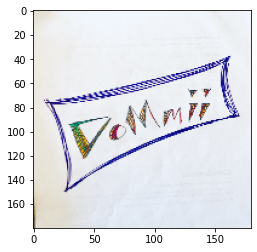

In [115]:
#Resize
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([tf.keras.layers.Resizing(IMG_SIZE, IMG_SIZE),tf.keras.layers.Rescaling(1./255)])
image_re = resize_and_rescale(image_r)
_ = plt.imshow(image_re)

In [118]:
print(f"Min and max pixel values, min: {image_re.numpy().min()}, max: {image_re.numpy().max()}")

Min and max pixel values, min: 0.0, max: 1.0


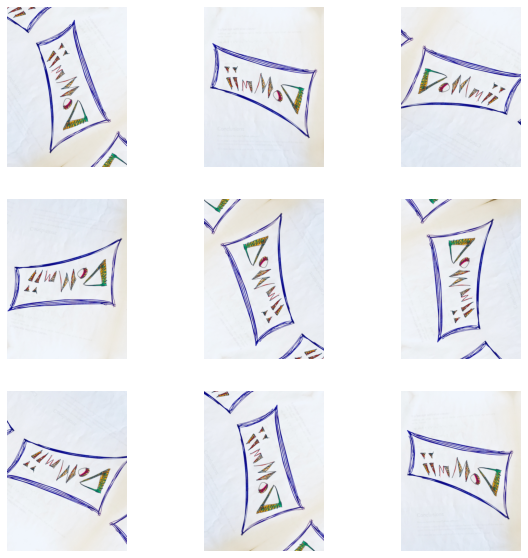

In [119]:
data_augmentation = tf.keras.Sequential([tf.keras.layers.RandomFlip("horizontal_and_vertical"),
                                         tf.keras.layers.RandomRotation(0.2),])

image_dim = tf.expand_dims(image_r, 0)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image_dim)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [120]:
def random_invert_img(x, p=0.5):
  if  tf.random.uniform([]) < p:
    x = (255-x)
  else:
    x
  return x

def random_invert(factor=0.5):
  return tf.keras.layers.Lambda(lambda x: random_invert_img(x, factor))


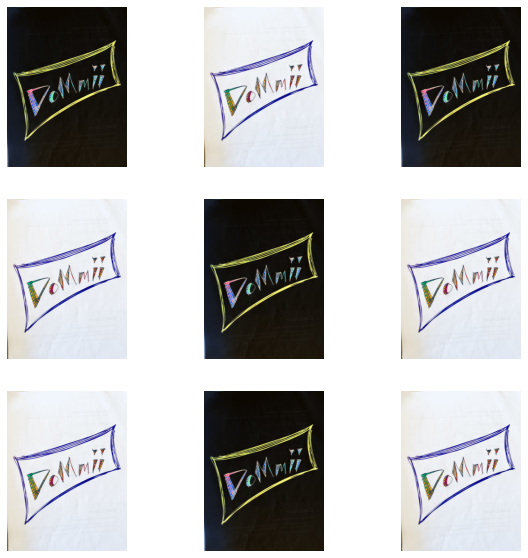

In [124]:
#Both layers will randomly invert the colors in an image, according to some probability.
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = random_invert(image_dim)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("off")

# **Set Range HSV of Target**

In [77]:
#Converts image from RGB to HSV.
image_h = tf.image.rgb_to_hsv(image_r, name=None)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


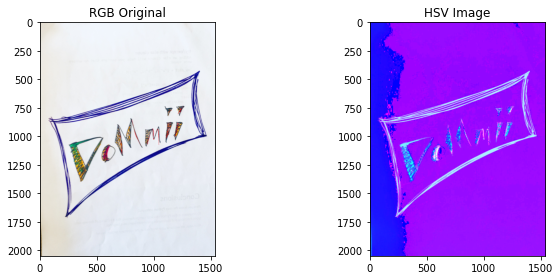

In [78]:
#Plot compare
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()

ax[0].imshow(image_r)
ax[0].set_title("RGB Original")
ax[1].imshow(image_h, cmap=plt.cm.hsv_r)
ax[1].set_title("HSV Image")

fig.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


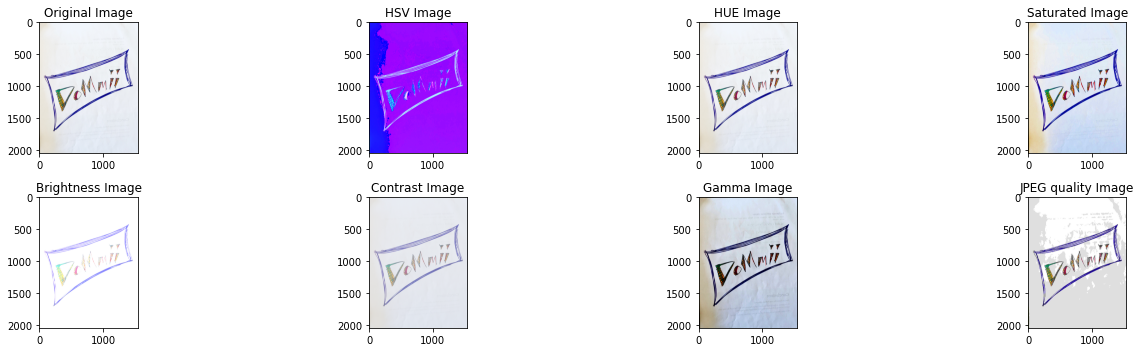

In [146]:
hue = tf.image.adjust_hue(image_r, 3)
saturated = tf.image.adjust_saturation(image_r, 3)
brightness = tf.image.adjust_brightness(image_r, 0.5)
contrast = tf.image.adjust_contrast(image_r, 0.5)
gamma = tf.image.adjust_gamma(image_r, 3)
value = tf.image.adjust_jpeg_quality(image_r, 3)

fig, ax  = plt.subplots(nrows=2,ncols=4, figsize =(20, 5))
ax[0][0].imshow(image_r)
ax[0][0].set_title('Original Image')
ax[0][1].imshow(image_h)
ax[0][1].set_title('HSV Image')
ax[0][2].imshow(hue)
ax[0][2].set_title('HUE Image')
ax[0][3].imshow(saturated)
ax[0][3].set_title('Saturated Image')
ax[1][0].imshow(brightness)
ax[1][0].set_title('Brightness Image')
ax[1][1].imshow(contrast)
ax[1][1].set_title('Contrast Image')
ax[1][2].imshow(gamma)
ax[1][2].set_title('Gamma Image')
ax[1][3].imshow(value)
ax[1][3].set_title('JPEG quality Image')

fig.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


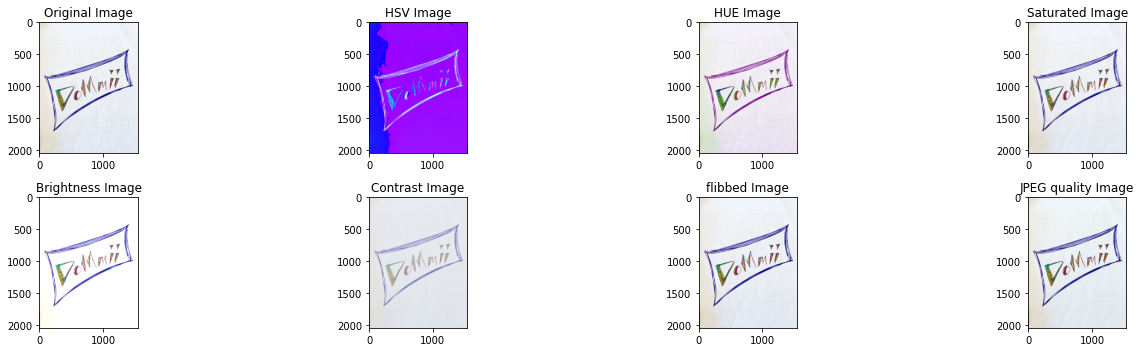

In [155]:
seed=(1,2) #random
hue = tf.image.stateless_random_hue(image_r, 0.2, seed)
saturated = tf.image.stateless_random_saturation(image_r, 0.5, 1.0, seed)
brightness = tf.image.stateless_random_brightness(image_r, 0.2, seed)
contrast = tf.image.stateless_random_contrast(image_r, 0.2, 0.5, seed)
flib = tf.image.stateless_random_flip_up_down(image_r, seed)
value = tf.image.stateless_random_jpeg_quality(image_r, 75, 95, seed)

fig, ax  = plt.subplots(nrows=2,ncols=4, figsize =(20, 5))
ax[0][0].imshow(image_r)
ax[0][0].set_title('Original Image')
ax[0][1].imshow(image_h)
ax[0][1].set_title('HSV Image')
ax[0][2].imshow(hue)
ax[0][2].set_title('HUE Image')
ax[0][3].imshow(saturated)
ax[0][3].set_title('Saturated Image')
ax[1][0].imshow(brightness)
ax[1][0].set_title('Brightness Image')
ax[1][1].imshow(contrast)
ax[1][1].set_title('Contrast Image')
ax[1][2].imshow(flib)
ax[1][2].set_title('flibbed Image')
ax[1][3].imshow(value)
ax[1][3].set_title('JPEG quality Image')

fig.tight_layout()
plt.show()

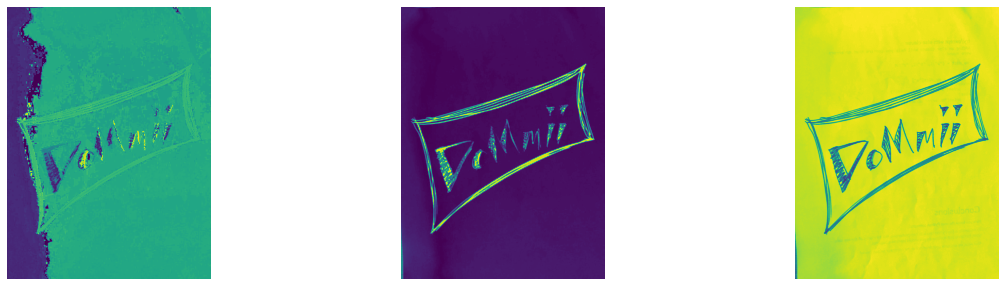

In [79]:
im_hue = image_h[:,:,0]
im_sat = image_h[:,:,1]
im_val = image_h[:,:,2]
# how to apply thershold ?

fig, ax  = plt.subplots(nrows=1,ncols=3, figsize =(20, 5))
fig.subplots_adjust(wspace=0.2)
ax[0].imshow(im_hue)
ax[0].set_axis_off()
ax[1].imshow(im_sat)
ax[1].set_axis_off()
ax[2].imshow(im_val)
ax[2].set_axis_off()

fig.tight_layout()
plt.show()

Hue: main color // H*255/360

Saturation: color purification // S*255/100

Value: Bright // V*255/100

In [80]:
image_h.shape

TensorShape([2048, 1536, 3])

# **Image Segmentation**

In [81]:
im_hue_arr = np.array(im_hue)
im_sat_arr = np.array(im_sat)
im_val_arr = np.array(im_val)

In [83]:
from skimage import measure

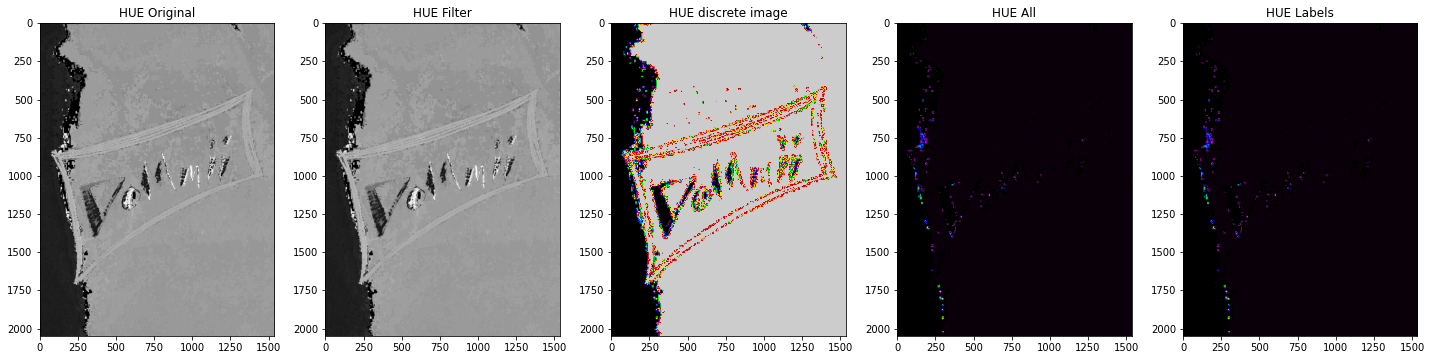

In [113]:
im = filters.gaussian(im_hue_arr, sigma=1)
blobs = im > im.mean()

all_labels = measure.label(blobs)
blobs_labels = measure.label(blobs, background=0)

#Plot compare
fig, axes = plt.subplots(1, 5, figsize=(20, 8))
ax = axes.ravel()

ax[0].imshow(im_hue_arr, cmap=plt.cm.gray)
ax[0].set_title("HUE Original")

ax[1].imshow(im, cmap=plt.cm.gray)
ax[1].set_title("HUE Filter")

ax[2].imshow(blobs, cmap = plt.cm.nipy_spectral)
ax[2].set_title("HUE discrete image")

ax[3].imshow(all_labels, cmap = plt.cm.nipy_spectral)
ax[3].set_title("HUE All")

ax[4].imshow(blobs_labels, cmap = plt.cm.nipy_spectral)
ax[4].set_title("HUE Labels")

fig.tight_layout()
plt.show()

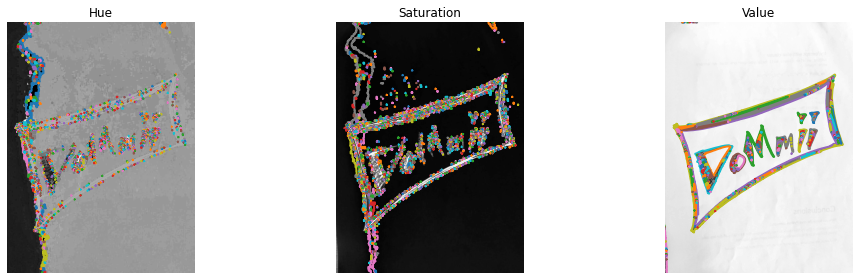

In [86]:
# Find contours at a constant value
im_hua_contours = measure.find_contours(im_hue_arr, 0.01)
im_sat_contours = measure.find_contours(im_sat_arr, 0.01)
im_val_contours = measure.find_contours(im_val_arr, 200)

# Display the image and plot all contours found
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].imshow(im_hue_arr, cmap=plt.cm.gray)
axes[1].imshow(im_sat_arr, cmap=plt.cm.gray)
axes[2].imshow(im_val_arr, cmap=plt.cm.gray)

for im_hua_contour in im_hua_contours:
    axes[0].plot(im_hua_contour[:, 1], im_hua_contour[:, 0], linewidth=2)

axes[0].set_axis_off()
axes[0].set_title("Hue")

for im_sat_contour in im_sat_contours:
    axes[1].plot(im_sat_contour[:, 1], im_sat_contour[:, 0], linewidth=2)

axes[1].set_axis_off()
axes[1].set_title("Saturation")

for im_val_contour in im_val_contours:
    axes[2].plot(im_val_contour[:, 1], im_val_contour[:, 0], linewidth=2)

axes[2].set_axis_off()
axes[2].set_title("Value")


fig.tight_layout()
plt.show()

In [87]:
from scipy import ndimage
from skimage import morphology
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage import segmentation

In [88]:
im_hue_arrd = im_hue_arr.astype('int64')

In [89]:
# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance
# to the background
distance = ndimage.distance_transform_edt(im_hue_arrd)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=im_hue_arrd)
markers = morphology.label(local_maxi)
labels_ws = watershed(-distance, markers, mask=im_hue_arrd)

# Transform markers image so that 0-valued pixels are to
# be labelled, and -1-valued pixels represent background
markers[~im_hue_arrd] = -1
labels_rw = segmentation.random_walker(im_hue_arrd, markers)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  """
/usr/local/lib/python3.7/dist-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,
/usr/local/lib/python3.7/dist-packages/skimage/segmentation/random_walker_segmentation.py:470: UserWarning: All unlabeled pixels are isolated, they could not be determined by the random walker algorithm.
  inds_isolated_seeds, isolated_values) = _preprocess(labels)


In [90]:
# compute the size and perimeter of the two segmented regions
properties = measure.regionprops(labels_rw)

for prop in properties :
  print(prop.area)
for prop in properties :
  print(prop.perimeter)

In [91]:
for prop in properties :
  prop.area

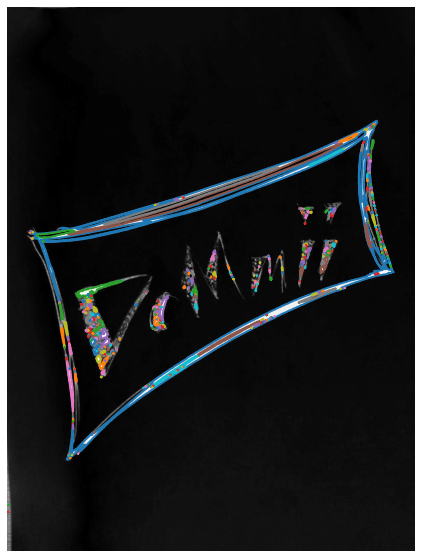

In [92]:
# Find contours at a constant value of 0.8
contours = measure.find_contours(im_sat_arr, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(im_sat_arr, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_axis_off()
plt.show()

# **Gray colour and range of thresholds**

In [93]:
#Converts image from RGB to Gray.
image_g = tf.image.rgb_to_grayscale(image_r, name=None)
image_g = np.array(image_g)
print(image_g.shape)

(2048, 1536, 1)


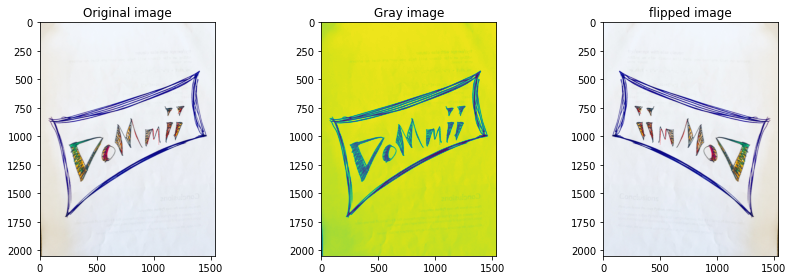

In [140]:
flipped = tf.image.flip_left_right(image_r)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].set_title('Original image')
axes[0].imshow(image_r)

axes[1].set_title('Gray image')
axes[1].imshow(tf.squeeze(image_g))

axes[2].set_title('flipped image')
axes[2].imshow(tf.squeeze(flipped))

fig.tight_layout()
plt.show()

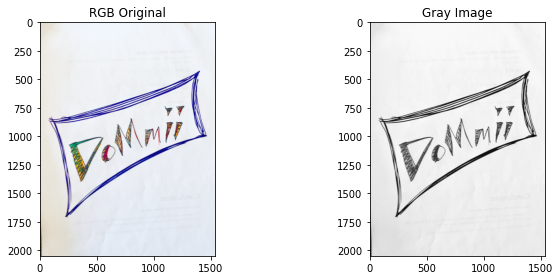

In [135]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].imshow(image_r)
axes[0].set_title("RGB Original")
axes[1].imshow(image_g[:,:,0], cmap=plt.cm.gray)
axes[1].set_title("Gray Image")

fig.tight_layout()
plt.show()

In [95]:
image_gray = image_g[:,:,0]/image_g.max()
image_gray.max()

1.0

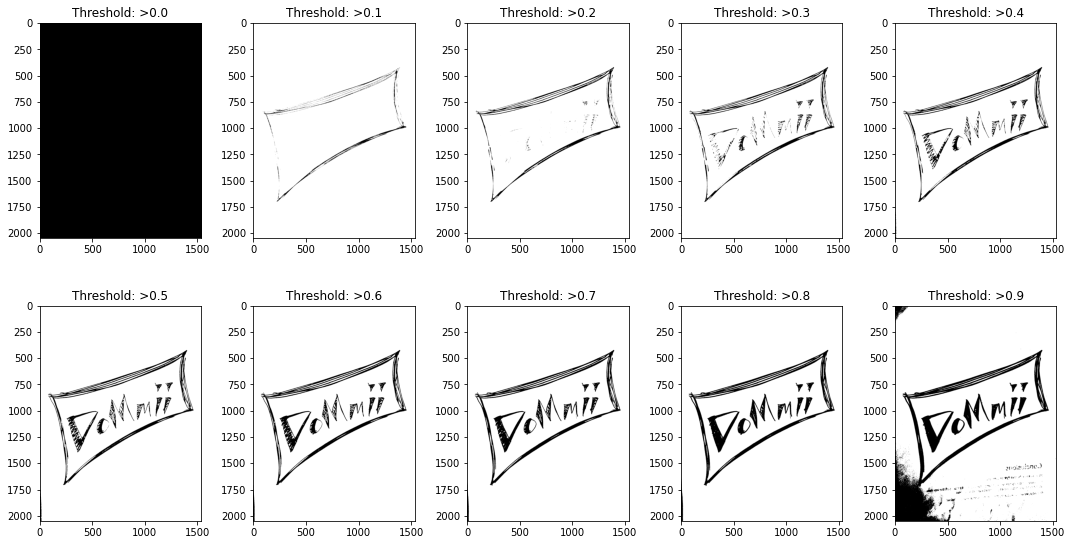

In [96]:
plt.figure(figsize=(15, 8))
 
for i in range(10):
   
  # Iterating different thresholds
  binarized_gray = (image_gray > i*0.1)*1
  plt.subplot(2,5,i+1)
   
  # Rounding of the threshold
  # value to 1 decimal point
  plt.title("Threshold: >"+str(round(i*0.1,1)))
   
  # Displaying the binarized image
  # of various thresholds
  plt.imshow(binarized_gray, cmap=plt.cm.gray)
   
plt.tight_layout()

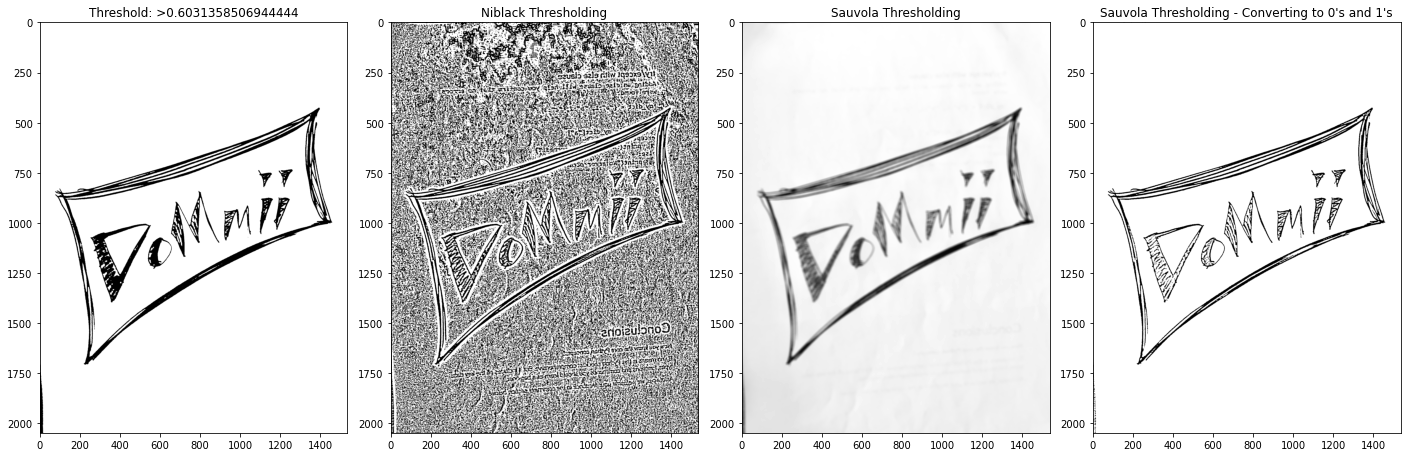

In [97]:
# Importing necessary libraries
from skimage import filters

# plot
fig, axes = plt.subplots(1, 4, figsize=(20, 12))

threshold = filters.threshold_otsu(image_gray) # Computing Otsu's thresholding value
binarized_gray = (image_gray > threshold)*1 # Computing binarized values using the obtained # threshold
axes[0].set_title("Threshold: >"+str(threshold))
axes[0].imshow(binarized_gray, cmap=plt.cm.gray)

threshold = filters.threshold_niblack(image_gray) #Computing Ni black's local pixel #threshold values for every pixel
binarized_gray = (image_gray > threshold)*1 # Computing binarized values using the obtained # threshold
axes[1].set_title("Niblack Thresholding")
axes[1].imshow(binarized_gray, cmap=plt.cm.gray)

threshold = filters.threshold_sauvola(image_gray) # Computing Sauvola's local pixel threshold # values for every pixel - Not Binarized
axes[2].set_title("Sauvola Thresholding")
axes[2].imshow(threshold, cmap=plt.cm.gray)

binarized_gray = (image_gray > threshold)*1 # Computing Sauvola's local pixel # threshold values for every pixel - Binarized
axes[3].set_title("Sauvola Thresholding - Converting to 0's and 1's")
axes[3].imshow(binarized_gray, cmap=plt.cm.gray)

fig.tight_layout()
plt.show()

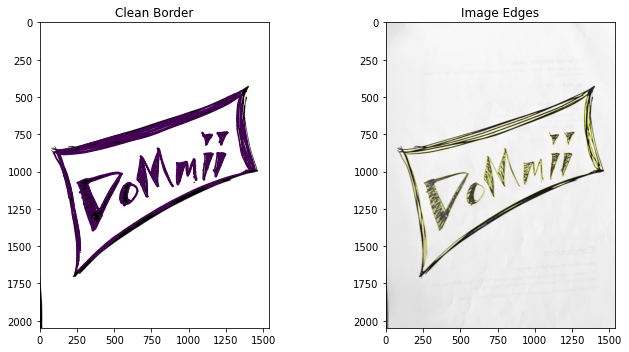

In [98]:
threshold = filters.threshold_otsu(image_gray) # Computing Otsu's thresholding value
binarized_gray = (image_gray > threshold)*1 

clean_border = segmentation.clear_border(binarized_gray) #Clean

im_edges = segmentation.mark_boundaries(image_gray, clean_border.astype(np.int)) #Image Edges

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].set_title('Clean Border')
axes[0].imshow(binarized_gray, cmap=plt.cm.gray)
axes[0].contour(clean_border, [0.5]) 

axes[1].set_title('Image Edges')
axes[1].imshow(im_edges)

fig.tight_layout()
plt.show()

In [99]:
# Importing necessary libraries
from skimage.filters import gaussian
from skimage.segmentation import active_contour

# Applying Gaussian Filter to remove noise
image_gray_noiseless = gaussian(image_gray, sigma=1, mode='reflect')

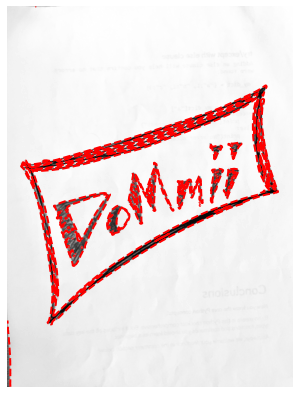

In [100]:
# Find contours at a constant value
contours = measure.find_contours(image_gray_noiseless, 0.7)

# Display the image and plot all contours found
fig, ax = plt.subplots(figsize=(10,7))
ax.imshow(image_gray_noiseless, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], 'r--',linewidth=2)

ax.axis('image')
ax.set_axis_off()
plt.show()